In [2]:
import pandas as pd

# Bước 1: Đọc dữ liệu từ file CSV
data = pd.read_csv('v3_sentences_pseudo.csv')
# Kiểm tra cột trong dataset
print(data)

                                                    txt  lbl  prob_positve
0            lần thứ mua ở shop nên chất_lượng khỏi bàn    1      0.992806
1            quan_trọng nhất là shop phục_vụ cực_kì tốt    1      0.992547
2             lần này đặt còn được tặng mã giảm_giá nữa    1      0.907405
3        ncl mình re com men de d mọi người nên mua nha    1      0.992778
4                                   than k shop ạ iu iu    0      0.044322
...                                                 ...  ...           ...
8444  giao hơi lâu_son đẹp vỏ_son cũng đẹp h d s d v...    1      0.572878
8445                                       công_dụng ok    1      0.984814
8446  em bé_son thỏi này sẽ không làm nàng thất_vọng...    1      0.981413
8447  chất_son em bé này này mềm mịn như bơ vậy á lư...    1      0.992622
8448  nhà ki s s me toàn những màu siêu đẹp lại có s...    1      0.992489

[8449 rows x 3 columns]


In [3]:
import pandas as pd
import numpy as np

# Đọc dữ liệu từ file CSV
data = pd.read_csv('v3_sentences_pseudo.csv')

# Thêm cột user_id và clothes_id với giá trị ngẫu nhiên từ 1 đến 100
data['user_id'] = np.random.randint(1, 101, size=len(data))
data['clothes_id'] = np.random.randint(1, 101, size=len(data))

# Kiểm tra kết quả
print(data.head())

                                              txt  lbl  prob_positve  user_id  \
0      lần thứ mua ở shop nên chất_lượng khỏi bàn    1      0.992806       50   
1      quan_trọng nhất là shop phục_vụ cực_kì tốt    1      0.992547       48   
2       lần này đặt còn được tặng mã giảm_giá nữa    1      0.907405       31   
3  ncl mình re com men de d mọi người nên mua nha    1      0.992778       61   
4                             than k shop ạ iu iu    0      0.044322       87   

   clothes_id  
0          22  
1          54  
2          14  
3          89  
4           3  


In [4]:
import re
# Chuẩn hóa văn bản
def normalize_text(text):
 text = re.sub(r'\W+', ' ', text)
 text = text.lower()
 return text
data['text_normalized'] = data['txt'].apply(normalize_text)

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
texts = data['text_normalized'].values
labels = data['lbl'].values
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [6]:
print(sequences)

[[104, 452, 12, 212, 15, 20, 1, 18, 547, 372], [330, 875, 323, 32, 15, 400, 423, 202, 411, 17], [104, 77, 135, 91, 45, 262, 434, 575, 25, 124], [651, 42, 548, 1059, 1213, 357, 29, 102, 87, 20, 12, 21], [549, 11, 15, 41, 601, 601], [1836], [44, 65, 37, 5, 59, 316, 58, 226, 401, 94, 145, 116, 652, 5, 26, 55], [15, 92, 1837, 125, 263, 169, 19, 6, 36, 1447], [804, 507, 48, 876, 45, 168, 15, 299, 6, 136, 139, 224, 15, 51, 51, 61, 85, 83, 15, 126, 232], [805, 20, 12, 21], [44, 212, 264, 68, 101, 142, 31], [61, 85, 83, 163, 88, 70, 13, 14, 21, 90], [44, 424, 424, 424, 424, 5, 233], [117, 12, 113, 44, 111, 15, 148, 185, 48, 136], [180, 203, 44, 111, 15, 60, 373, 12, 244, 197, 148, 109, 94, 15, 40, 16, 164, 170, 91, 366, 347, 151, 1060, 690, 691, 692, 180, 105, 358], [119, 191, 61, 85, 83, 15, 163], [330, 875, 323, 32, 15, 400, 423, 202, 411, 17], [15, 19, 6, 180, 36, 182], [229, 617, 42, 137, 253, 44, 94, 183, 508, 485, 1, 44, 40, 300], [25, 348, 111, 44, 40, 180, 65, 161, 204, 188, 91, 149, 2

In [6]:
# Đảm bảo tất cả chuỗi có độ dài cố định
max_sequence_length = 100
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = labels

In [7]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42)
# Kiểm tra kết quả
print("Kích thước tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)

Kích thước tập huấn luyện: (6759, 100) (6759,)
Kích thước tập kiểm tra: (1690, 100) (1690,)


In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
# Thêm early stopping để tránh overfitting
early_stopping = EarlyStopping(
 monitor='val_loss', patience=3, restore_best_weights=True)
# Định nghĩa một hàm để vẽ biểu đồ lịch sử huấn luyện
def plot_history(history, model_name):
 plt.figure(figsize=(14, 5))
 # Biểu đồ mất mát
 plt.subplot(1, 2, 1)
 plt.plot(history.history['loss'], label='Training Loss')
 plt.plot(history.history['val_loss'], label='Validation Loss')
 plt.title(f'{model_name} - Loss')
 plt.xlabel('Epochs')
 plt.ylabel('Loss')
 plt.legend()
 # Biểu đồ độ chính xác
 plt.subplot(1, 2, 2)
 plt.plot(history.history['accuracy'], label='Training Accuracy')
 plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
 plt.title(f'{model_name} - Accuracy')
 plt.xlabel('Epochs')
 plt.ylabel('Accuracy')
 plt.legend()
 plt.show()

Epoch 1/20
212/212 [==============================] - 4s 14ms/step - loss: 0.4459 - accuracy: 0.7764 - val_loss: 0.2861 - val_accuracy: 0.8923
Epoch 2/20
212/212 [==============================] - 2s 11ms/step - loss: 0.2074 - accuracy: 0.9223 - val_loss: 0.2338 - val_accuracy: 0.9059
Epoch 3/20
212/212 [==============================] - 2s 11ms/step - loss: 0.1109 - accuracy: 0.9612 - val_loss: 0.3534 - val_accuracy: 0.9006
Epoch 4/20
212/212 [==============================] - 2s 11ms/step - loss: 0.0727 - accuracy: 0.9754 - val_loss: 0.3519 - val_accuracy: 0.9012
Epoch 5/20
212/212 [==============================] - 2s 11ms/step - loss: 0.0423 - accuracy: 0.9861 - val_loss: 0.4863 - val_accuracy: 0.8994
Epoch 6/20
212/212 [==============================] - 2s 11ms/step - loss: 0.0383 - accuracy: 0.9871 - val_loss: 0.5732 - val_accuracy: 0.8988
Epoch 7/20
212/212 [==============================] - 2s 12ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.5310 - val_accuracy: 0.9036

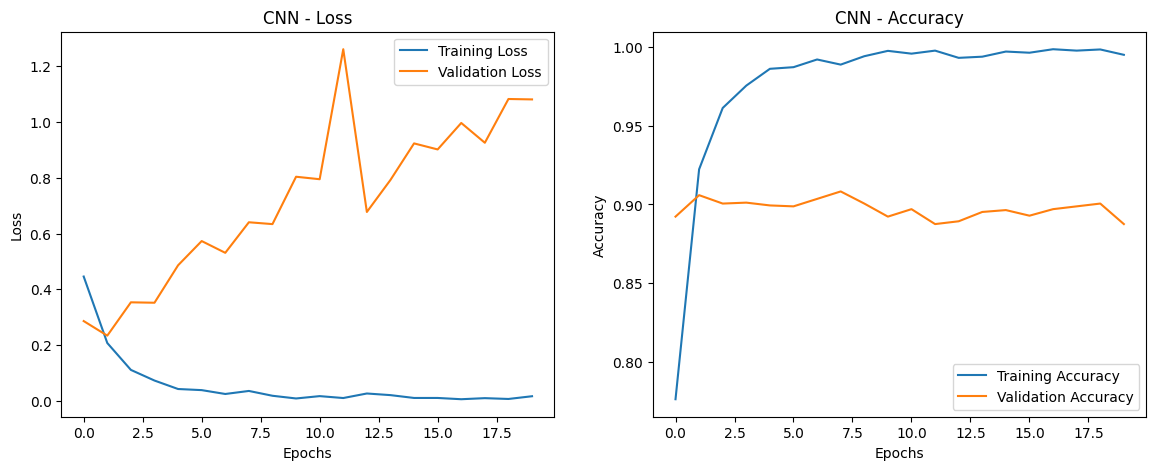

In [9]:
# 1. Mô hình CNN
model_cnn = models.Sequential()
model_cnn.add(layers.Embedding(input_dim=10000,
 output_dim=128, input_length=100))
model_cnn.add(layers.Conv1D(64, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(2))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(2))
model_cnn.add(layers.Conv1D(256, 5, activation='relu'))
model_cnn.add(layers.GlobalMaxPooling1D())
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam',
 loss='binary_crossentropy', metrics=['accuracy'])


history_cnn = model_cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
plot_history(history_cnn, "CNN")

Epoch 1/20
212/212 [==============================] - 12s 49ms/step - loss: 0.4109 - accuracy: 0.8047 - val_loss: 0.3300 - val_accuracy: 0.8580
Epoch 2/20
212/212 [==============================] - 10s 47ms/step - loss: 0.1889 - accuracy: 0.9296 - val_loss: 0.2908 - val_accuracy: 0.8893
Epoch 3/20
212/212 [==============================] - 10s 48ms/step - loss: 0.1180 - accuracy: 0.9561 - val_loss: 0.2986 - val_accuracy: 0.8775
Epoch 4/20
212/212 [==============================] - 10s 46ms/step - loss: 0.0741 - accuracy: 0.9740 - val_loss: 0.3203 - val_accuracy: 0.8882
Epoch 5/20
212/212 [==============================] - 10s 47ms/step - loss: 0.0489 - accuracy: 0.9811 - val_loss: 0.4068 - val_accuracy: 0.8905
Epoch 6/20
212/212 [==============================] - 10s 47ms/step - loss: 0.0483 - accuracy: 0.9836 - val_loss: 0.3530 - val_accuracy: 0.8941
Epoch 7/20
212/212 [==============================] - 10s 48ms/step - loss: 0.0331 - accuracy: 0.9889 - val_loss: 0.4074 - val_accuracy:

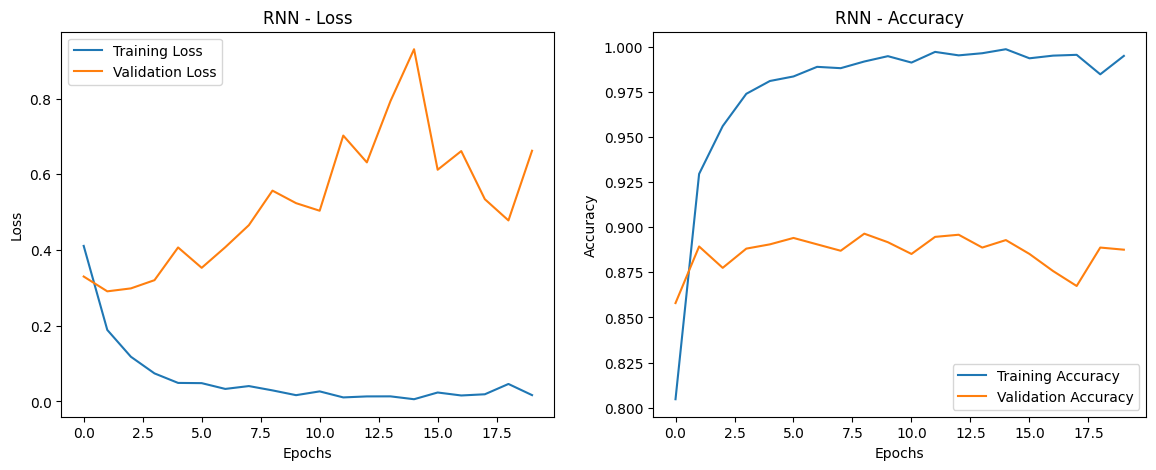

In [10]:
# 2. Mô hình RNN
model_rnn = models.Sequential()
model_rnn.add(layers.Embedding(input_dim=10000,
 output_dim=128, input_length=100))
model_rnn.add(layers.SimpleRNN(64, return_sequences=True, activation='relu'))
model_rnn.add(layers.SimpleRNN(128, return_sequences=True, activation='relu'))
model_rnn.add(layers.SimpleRNN(256, activation='relu'))
model_rnn.add(layers.Dense(128, activation='relu'))
model_rnn.add(layers.Dropout(0.5))
model_rnn.add(layers.Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='adam',
 loss='binary_crossentropy', metrics=['accuracy'])

history_rnn = model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
plot_history(history_rnn, "RNN")

Epoch 1/20
169/169 [==============================] - 31s 173ms/step - loss: 4105110.5000 - accuracy: 0.7032 - val_loss: 0.4308 - val_accuracy: 0.8306
Epoch 2/20
169/169 [==============================] - 29s 173ms/step - loss: 1267.3035 - accuracy: 0.8195 - val_loss: 0.3833 - val_accuracy: 0.8166
Epoch 3/20
169/169 [==============================] - 29s 171ms/step - loss: 0.4346 - accuracy: 0.8611 - val_loss: 0.3849 - val_accuracy: 0.8291
Epoch 4/20
169/169 [==============================] - 29s 174ms/step - loss: 913.1666 - accuracy: 0.8602 - val_loss: 0.7445 - val_accuracy: 0.6021
Epoch 5/20
169/169 [==============================] - 32s 187ms/step - loss: 0.5344 - accuracy: 0.7825 - val_loss: 0.3991 - val_accuracy: 0.8410
Epoch 6/20
169/169 [==============================] - 29s 174ms/step - loss: 293.4030 - accuracy: 0.8986 - val_loss: 0.4266 - val_accuracy: 0.8254
Epoch 7/20
169/169 [==============================] - 29s 174ms/step - loss: 0.2377 - accuracy: 0.9166 - val_loss: 0.

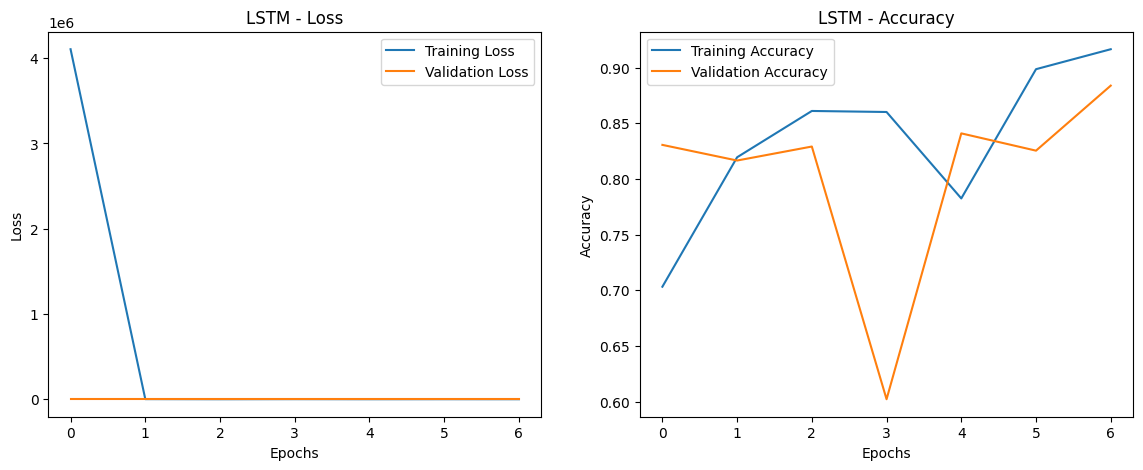

In [11]:
# 3. Xây dựng và huấn luyện mô hình LSTM
model_lstm = models.Sequential([
 layers.Embedding(input_dim=10000, output_dim=128, input_length=100),
 layers.LSTM(64, return_sequences=True, activation='relu'),
 layers.LSTM(128, return_sequences=True, activation='relu'),
 layers.LSTM(256, activation='relu'),
 layers.Dense(128, activation='relu'),
 layers.Dropout(0.5),
 layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(
 optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
plot_history(history_lstm, "LSTM")

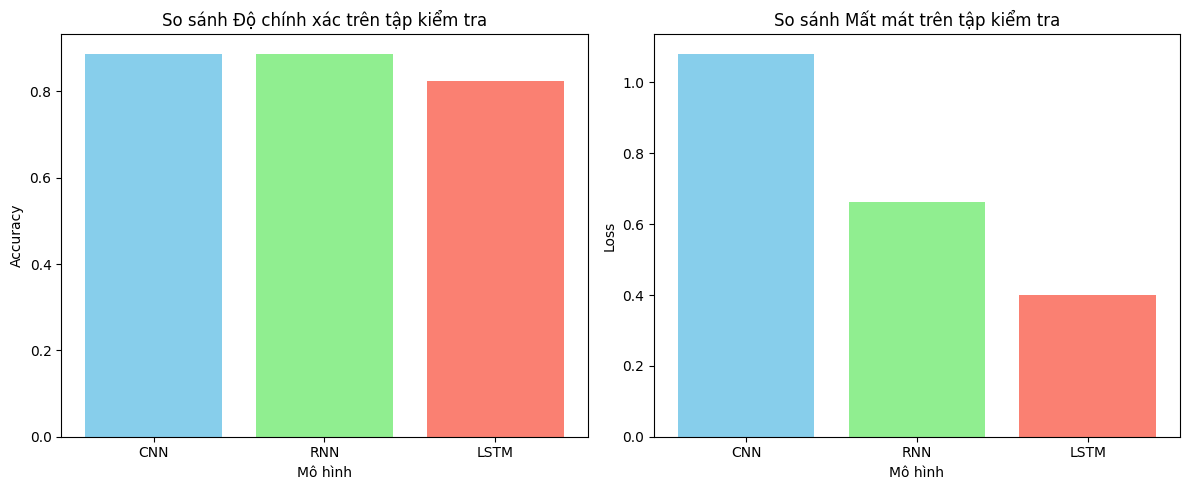

In [12]:
import matplotlib.pyplot as plt
# Đánh giá từng mô hình trên tập kiểm tra
cnn_eval = model_cnn.evaluate(X_test, y_test, verbose=0)
rnn_eval = model_rnn.evaluate(X_test, y_test, verbose=0)
lstm_eval = model_lstm.evaluate(X_test, y_test, verbose=0)
# Lưu các kết quả vào danh sách
model_names = ['CNN', 'RNN', 'LSTM']
test_accuracies = [cnn_eval[1], rnn_eval[1], lstm_eval[1]]
test_losses = [cnn_eval[0], rnn_eval[0], lstm_eval[0]]
# Vẽ biểu đồ so sánh accuracy của các mô hình
plt.figure(figsize=(12, 5))
# Biểu đồ accuracy
plt.subplot(1, 2, 1)
plt.bar(model_names, test_accuracies, color=[
 'skyblue', 'lightgreen', 'salmon'])
plt.title('So sánh Độ chính xác trên tập kiểm tra')
plt.xlabel('Mô hình')
plt.ylabel('Accuracy')
# Biểu đồ loss
plt.subplot(1, 2, 2)
plt.bar(model_names, test_losses, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('So sánh Mất mát trên tập kiểm tra')
plt.xlabel('Mô hình')
plt.ylabel('Loss')
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

53/53 [==============================] - 4s 69ms/step
Results for CNN Model:
MAE: 0.1124, MSE: 0.1124, RMSE: 0.3353, MAPE: 197199036938116.4688

Results for RNN Model:
MAE: 0.1124, MSE: 0.1124, RMSE: 0.3353, MAPE: 343765888716446.1250

Results for LSTM Model:
MAE: 0.1757, MSE: 0.1757, RMSE: 0.4192, MAPE: 341101036865931.1875


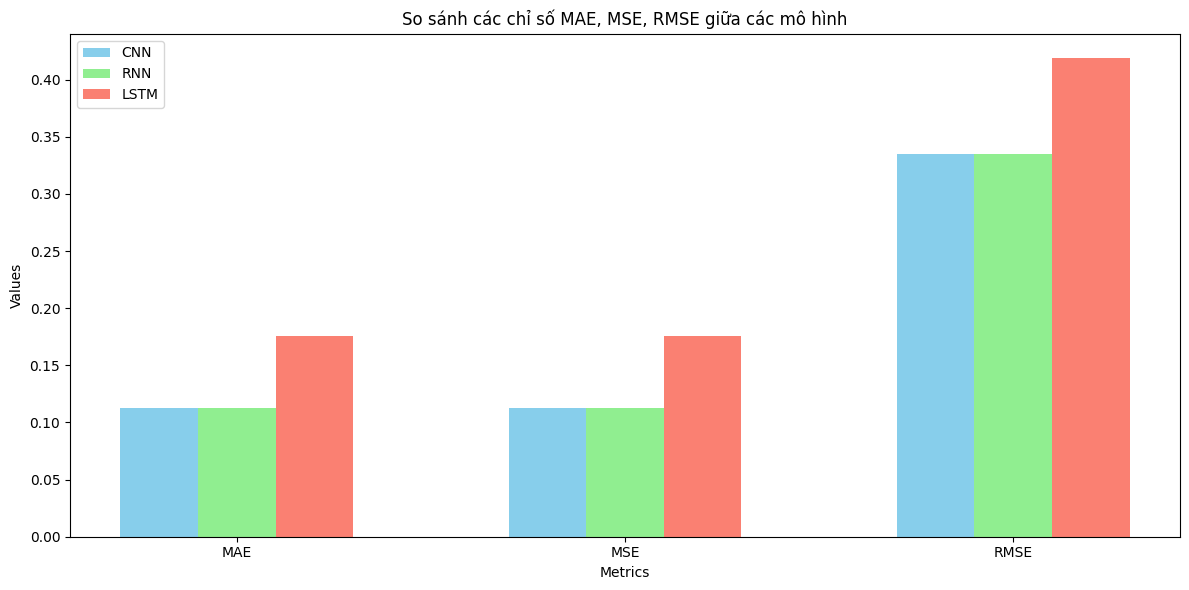

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Hàm tính RMSE từ MSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Đánh giá và tính toán MAE, MSE, RMSE, MAPE cho từng mô hình
def evaluate_model(model, X_test, y_test):
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    # Chuyển đổi giá trị dự đoán về dạng nhị phân nếu cần (0 hoặc 1)
    y_pred = (y_pred > 0.5).astype(int)
    
    # Tính các chỉ số đánh giá
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse_value = rmse(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    return mae, mse, rmse_value, mape

# Đánh giá và so sánh các mô hình
cnn_mae, cnn_mse, cnn_rmse, cnn_mape = evaluate_model(model_cnn, X_test, y_test)
rnn_mae, rnn_mse, rnn_rmse, rnn_mape = evaluate_model(model_rnn, X_test, y_test)
lstm_mae, lstm_mse, lstm_rmse, lstm_mape = evaluate_model(model_lstm, X_test, y_test)

# In kết quả
print(f"Results for CNN Model:")
print(f"MAE: {cnn_mae:.4f}, MSE: {cnn_mse:.4f}, RMSE: {cnn_rmse:.4f}, MAPE: {cnn_mape:.4f}")
print(f"\nResults for RNN Model:")
print(f"MAE: {rnn_mae:.4f}, MSE: {rnn_mse:.4f}, RMSE: {rnn_rmse:.4f}, MAPE: {rnn_mape:.4f}")
print(f"\nResults for LSTM Model:")
print(f"MAE: {lstm_mae:.4f}, MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAPE: {lstm_mape:.4f}")

# Vẽ biểu đồ so sánh các chỉ số
metrics = ['MAE', 'MSE', 'RMSE']
cnn_metrics = [cnn_mae, cnn_mse, cnn_rmse]
rnn_metrics = [rnn_mae, rnn_mse, rnn_rmse]
lstm_metrics = [lstm_mae, lstm_mse, lstm_rmse]

# Vẽ biểu đồ so sánh
x = np.arange(len(metrics))  # Vị trí trên trục x

plt.figure(figsize=(12, 6))

# Các bar cho từng mô hình
plt.bar(x - 0.2, cnn_metrics, 0.2, label='CNN', color='skyblue')
plt.bar(x, rnn_metrics, 0.2, label='RNN', color='lightgreen')
plt.bar(x + 0.2, lstm_metrics, 0.2, label='LSTM', color='salmon')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('So sánh các chỉ số MAE, MSE, RMSE giữa các mô hình')
plt.xticks(x, metrics)
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [14]:
# Lưu mô hình RNN sau khi huấn luyện
model_rnn.save('model_rnn.h5')
